# Sandbox - NHST vs Bayesian Hypothesis Testing

In [3]:
import numpy as np
import pandas as pd
from math import ceil

import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

## 1. Frequentist t-test

Steps :
1. Question about the difference of means of 2 independants groups with similar variances
2. Enunce the null and alternative hypothesis of the test : 
$$\mathcal{H}_0 : \mu_1 - \mu_2 = 0 \;$ vs $\;\mathcal{H}_1 : \mu_1 - \mu_2 \neq 0$$
3. Choose a statistic and its law under $\mathcal{H}_0$ : 
$$T = \frac{\overline{X_n} - \overline{Y_n}}{S_{X,Y}\sqrt{\frac{1}{n_X} + \frac{1}{n_Y}}} \stackrel{H_0}{\sim} \mathcal{T}_{n_X + n_Y - 2}$$
4. Choose a level $\alpha$ and compute the reject region $W$ : 
$$W = \left] -\infty ; -t_{1-\frac{\alpha}{2}}S_{X,Y}\sqrt{\frac{1}{n_X} + \frac{1}{n_Y}} \right] \cup \left[ t_{1-\frac{\alpha}{2}}S_{X,Y}\sqrt{\frac{1}{n_X} + \frac{1}{n_Y}} ; +\infty \right[$$
5. Compute $t_{obs}$ and take a decision
6. Compute the power $P(T \in W | \mathcal{H}_1)$

## 2. Bayesian equivalent

Steps :

1. Question about the difference of means of 2 independants groups
2. H0 / H1
3. Choose a distribution model for the situation (here : Student)
4. Define prior distributions (mu1, mu2, sigma1, sigma2, nu)
5. Compute posterior distributions of each parameter and of size effect (Markov Chain Monte Carlo) 
6. Compute the HDI on each distribution
7. Reject H0 if the value is out the HDI

## 3. Application

### i. Bayesian Testing on proportion

In this situation, we try to know if a coin is biased, so if $X \sim \mathcal{B}(\theta)$ (with X the coin flip and $\theta$ the probability of doing tails (1), we try to verify if $\theta = 0.5$. With Bayesian Testing, we can do more than that and try to estimate the true value of $\theta$.

In [186]:
nThetaVals = 80 #number of possibles values for theta

Theta = np.linspace(1/(nThetaVals), nThetaVals/(nThetaVals), num=nThetaVals) # possible theta candidates between 0 and 1

pTheta = np.minimum(Theta, 1-Theta) # prior distribution of theta (triangular)
pTheta = pTheta / sum(pTheta) # all probabilities sum to 1

Data = np.array([1,0,0,1,0,1,0,0,0,0,0,0,0,0,]) # collected datas
nHeads = np.sum(Data==1)
nTails = np.sum(Data==0)

pDataGivenTheta = Theta**nHeads * (1-Theta)**nTails # likelihood of the datas for each theta candidate

pData = sum(pDataGivenTheta * pTheta)
pThetaGivenData = pDataGivenTheta * pTheta / pData # posterior distribution of theta

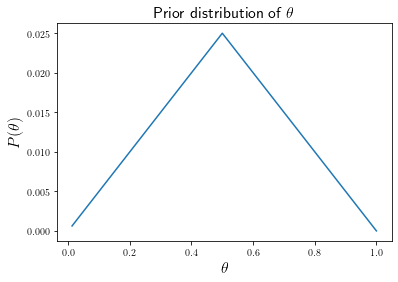

In [187]:
plt.plot(Theta, pTheta)
plt.xlabel(r"$\theta$",fontsize=16), plt.ylabel(r"$P(\theta)$",fontsize=16)
plt.title(r"Prior distribution of $\theta$",fontsize=16);

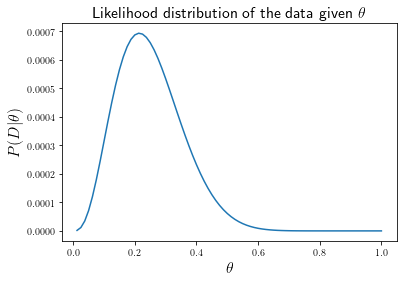

In [188]:
plt.plot(Theta, pDataGivenTheta)
plt.xlabel(r"$\theta$",fontsize=16), plt.ylabel(r"$P(D|\theta)$",fontsize=16)
plt.title(r"Likelihood distribution of the data given $\theta$",fontsize=16);

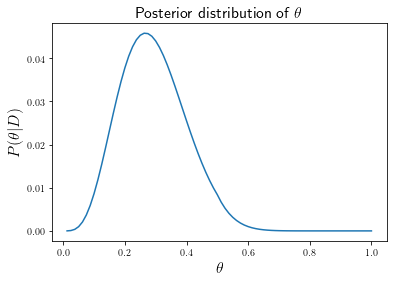

In [189]:
plt.plot(Theta, pThetaGivenData)
plt.xlabel(r"$\theta$",fontsize=16), plt.ylabel(r"$P(\theta|D)$",fontsize=16)
plt.title(r"Posterior distribution of $\theta$",fontsize=16);

In [190]:
# now we try to construct Highest Density Interval on Theta 

alpha = 0.05

i = 0
while sum(np.sort(pThetaGivenData)[::-1][:i])<(1-alpha):
    i+=1

sortTheta = [Theta[i] for i in np.argsort(-1*pThetaGivenData)]
HDI = np.sort(sortTheta[:i])

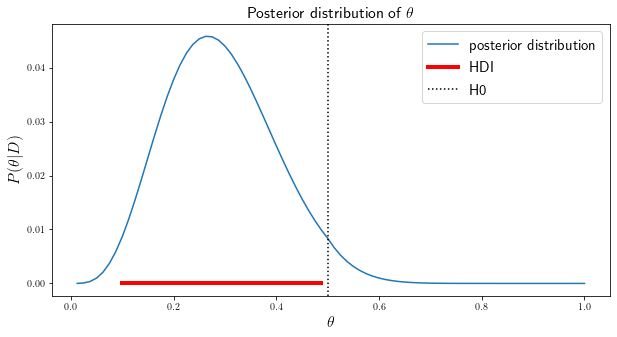

In [191]:
#plot the final interpretation
plt.figure(figsize=(10,5))
plt.plot(Theta, pThetaGivenData, label="posterior distribution")
plt.plot(HDI,[0]*len(HDI),c="red", lw=4, label="HDI")
plt.axvline(x=0.5,c="black",ls=":", label="H0")
plt.xlabel(r"$\theta$",fontsize=16), plt.ylabel(r"$P(\theta|D)$",fontsize=16)
plt.title(r"Posterior distribution of $\theta$",fontsize=16)
plt.legend(prop={'size': 15});

In [16]:
L1 = np.array([i for i in range(10,100,10)])
L2 = np.array([3,4,5,2,1,6,7,8,9])
print([L1[i] for i in np.argsort(L2)])

[50, 40, 10, 20, 30, 60, 70, 80, 90]
